In [75]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [5]:
# 데이터셋 로드 하는 함수
def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = list(map(float, curLine)) # 모든 값을 float으로 변환
        dataMat.append(fltLine) # 매트릭스에 추가
    return dataMat

In [6]:
# 노드에 대한 모델을 구하기 위해 호출됨.
# 회귀 트리에서 모델은 목적 변수에 대한 평균값을 이야기 함.
def regLeaf(dataSet):
    return np.mean(dataSet[:, -1])

In [7]:
# 오류 평가
# 목적 변수에 대한 제곱 오류를 반환.
# 제곱 오류는 평균을 계산한 다음 편차를 계산 한 후 이것을 제곱하면됨. ( var() : 평균 제곱 오류를 계산하는 함수 )
def regErr(dataSet):
    return np.var(dataSet[:, -1]) * np.shape(dataSet)[0] # np.shape을 곱하는 이유 - 사례의 개수 만큼 곱해야 전체 제곱의 오류값이 나옴.

In [22]:
# 데이터에 대해 이진 분할을 만드는 함수.
# feature - 분할을 위한 속성
# value   - 분할을 위한 값
# mat0 - 왼쪽 분할된 데이터 셋
# mat1 - 오른쪽 분할된 데이터 셋
def binSplitDataSet(dataSet, feature, value):
#     print(np.nonzero(dataSet[:, feature] > value))
#   >> (array([55], dtype=int64), array([0], dtype=int64)) 형식으로 반환되는데
#  해당 모양은 ([55],[0])  형태라고 보면 이해하기 쉽다.
#  np.nonzero(dataSet[:, feature] > value)[0] 은 [55]
#  np.nonzero(dataSet[:, feature] > value)[1] 은 [0]
    mat0 = dataSet[np.nonzero(dataSet[:, feature] > value)[0], :]
    mat1 = dataSet[np.nonzero(dataSet[:, feature] <= value)[0], :]
#  return 값은 해당 index의 dataSet이 반환됨.
    return mat0, mat1

In [9]:
def createTree(dataSet, leafType = regLeaf, errType = regErr, ops=(1, 4)):
    feat, val = chooseBestSplit(dataSet, leafType, errType, ops)
    if feat == None:
        return val
    retTree = {}
    retTree["spInd"] = feat
    retTree["spVal"] = val
    lSet, rSet = binSplitDataSet(dataSet, feat, val) 
    retTree["left"] = createTree(lSet, leafType, errType, ops)
    retTree["right"] = createTree(rSet, leafType, errType, ops)
    return retTree

In [127]:
# 분할 하기 가장 좋은 속성을 찾는 함수.
# leafType - 단말 노드를 생성하기 위해 사용한 함수를 참조( 목적 변수에 대한 평균값 )
# errType - 평균의 제곱 편차를 계산하기 위해 사용되었던 함수를 참조 ( 오류 평가 )
# ops - 트리 구축을 돕기 위한 사용자 정의 매개변수의 쌍
# Return 값이 None 이면 모델 유형에 관한 값을 반환
#             회귀 트리인 경우 : 상수값
#             모델 트리의 경우 : 선형방정식

def chooseBestSplit(dataSet, leafType = regLeaf, errType=regErr, ops=(1,4)):
    tolS = ops[0] # 오류를 줄이기 위해 사용되는 오차 범위
    tolN = ops[1] # 분할에 포함되는 데이터 사례의 최소 개수
    
    if len(set(dataSet[:, -1].T.tolist()[0])) == 1: # 집합의 길이가 1 이면 모든 값이 동일 하므로 종료.
        return None, leafType(dataSet)
    
    m, n = np.shape(dataSet)
    S = errType(dataSet) # 전체 오류 
#     print("S : ",S)
    bestS = np.inf # np.inf : 무한
    bestIndex = 0
    bestValue = 0
    
    for featIndex in range(n-1):
        for splitVal in set(dataSet[:, featIndex].T.tolist()[0]):
            mat0, mat1 = binSplitDataSet(dataSet, featIndex, splitVal)
            if (np.shape(mat0)[0] < tolN) or (np.shape(mat1)[0] < tolN):
                continue
            newS = errType(mat0) + errType(mat1) # 개선된 오류
            if newS < bestS:
                bestIndex = featIndex
                bestValue = splitVal
                bestS = newS
#                 print("Best S : ",bestS)
    # 오차 범위 보다 작은 경우 더이상 분할 하지 않음.
#     print("S - bestS = ", (S - bestS))
    if (S - bestS) < tolS :
#         print("First")
        return None, leafType(dataSet)
    
    mat0, mat1 = binSplitDataSet(dataSet, bestIndex, bestValue)
    
    # 사용자가 정의한 분할 개수보다 작으면 분할하지 않음.
    if(np.shape(mat0)[0] < tolN ) or (np.shape(mat1)[0] < tolN):
#         print("Second")
        return None, leafType(dataSet)
#     print("Third")
    # 초기 종료 조건을 만족하지 못하면 분할에 사용될 속성과 분할을 수행하기 위한 값 반환.
    return bestIndex, bestValue

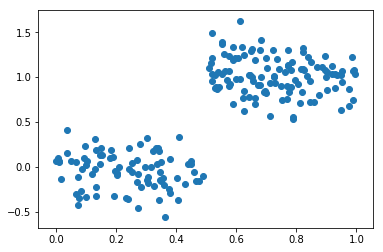

In [80]:
myDat = loadDataSet("ex00.txt")
myDat
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(np.array(myDat)[:,0], np.array(myDat)[:,1])

In [76]:
myMat = np.mat(myDat)
createTree(myMat)

S :  63.380639385992986
Best S :  48.52414991926482
Best S :  18.677873992952765
Best S :  14.121976195937993
Best S :  11.032779758421293
Best S :  8.354746519859859
S - bestS =  55.02589286613313
Third
S :  4.972326818084716
Best S :  4.929168055134403
Best S :  4.8359094238103415
Best S :  4.832964644925257
Best S :  4.790643111016122
Best S :  4.737980560079558
Best S :  4.725817836318908
Best S :  4.696582753175182
Best S :  4.6936831704767785
Best S :  4.628961207021919
S - bestS =  0.34336561106279717
First
S :  3.382419701775143
Best S :  3.2577490212682223
Best S :  3.246194035682602
Best S :  3.218717562585377
Best S :  3.198463646322059
S - bestS =  0.18395605545308413
First


{'left': 1.0180967672413792,
 'right': -0.04465028571428572,
 'spInd': 0,
 'spVal': 0.48813}

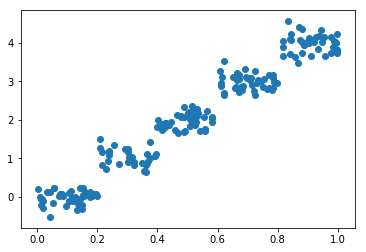

In [82]:
myDat1 = loadDataSet("ex0.txt")
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.scatter(np.array(myDat1)[:,1], np.array(myDat1)[:,2])

myMat1 = np.mat(myDat1)

In [78]:
createTree(myMat1)

S :  419.94847882004353
Best S :  124.97212352676091
Best S :  110.27893654401815
S - bestS =  309.66954227602537
Third
S :  87.74857910557756
Best S :  53.4040562841492
Best S :  34.13258062982599
Best S :  32.141073824789494
Best S :  28.093496114982045
Best S :  26.594940242205503
Best S :  26.065192085871434
S - bestS =  61.68338701970613
Third
S :  24.58818593225865
Best S :  21.699461100008325
Best S :  14.661085400753336
Best S :  6.388830527540218
Best S :  3.7182231645743076
S - bestS =  20.869962767684342
Third
S :  2.1571155686284005
Best S :  2.1038467887600936
Best S :  2.0811965809011728
S - bestS =  0.07591898772722772
First
S :  1.561107595945907
Best S :  1.5605128835999689
Best S :  1.5488874724078228
Best S :  1.5360458190364925
Best S :  1.5352574752332346
Best S :  1.5302572831500518
Best S :  1.51125831498464
Best S :  1.5084709674876757
Best S :  1.415094535702279
S - bestS =  0.14601306024362803
First
S :  1.4770061536127856
Best S :  1.4676644228358964
Best S :

{'left': {'left': {'left': 3.9871632,
   'right': 2.9836209534883724,
   'spInd': 1,
   'spVal': 0.797583},
  'right': 1.980035071428571,
  'spInd': 1,
  'spVal': 0.582002},
 'right': {'left': 1.0289583666666666,
  'right': -0.023838155555555553,
  'spInd': 1,
  'spVal': 0.197834},
 'spInd': 1,
 'spVal': 0.39435}

In [18]:
createTree(myMat, ops=(0,1))

{'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': 1.035533,
                'right': 1.077553,
                'spInd': 0,
                'spVal': 0.993349},
               'right': {'left': 0.744207,
                'right': 1.069062,
                'spInd': 0,
                'spVal': 0.988852},
               'spInd': 0,
               'spVal': 0.989888},
              'right': 1.227946,
              'spInd': 0,
              'spVal': 0.985425},
             'right': {'left': {'left': 0.862911,
               'right': 0.673579,
               'spInd': 0,
               'spVal': 0.975022},
              'right': {'left': {'left': 1.06469,
                'right': {'left': 0.945255,
                 'right': 1.022906,
                 'spInd': 0,
                 'spVal': 0.950153},
                'spInd': 0,
                'spVal': 0.951949},
               'right': {'left': 0.631862,
 

## 트리 가지치기

* 사전 가지치기 
 - chooseBestSplit()에서 ops 로 주어지는 종료 조건을 사용하는 방법
 - 종료 조건을 아무렇게나 설정 할 수 없음. (원하는 것이 무엇인지 모르기 때문임)
* 사후 가지치기
 - 검사 집합과 훈련 집합을 모두 사용
 - 종료 조건이 없기 때문에 사전 가지치기 보다 더 이상적이다.

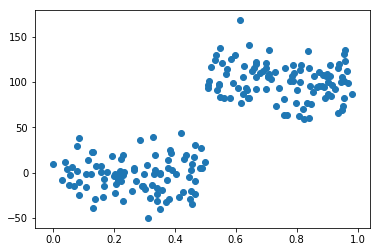

In [88]:
myDat2 = loadDataSet("ex2.txt")
myMat2 = np.mat(myDat2)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.scatter(np.array(myDat2)[:,0], np.array(myDat2)[:,1])

In [89]:
createTree(myMat2, ops=(10000, 4)) # 오차 범위를 아무렇게 설정하면 단말 노드가 두개인 트리를 얻게 됨.

S :  614429.5925963038
Best S :  245181.6831974431
Best S :  133857.10694059392
Best S :  83328.52985018637
Best S :  75619.17889458839
S - bestS =  538810.4137017154
Third
S :  40546.81293130728
Best S :  40518.7249999378
Best S :  40104.76190225976
Best S :  37389.90001018421
Best S :  37363.263286667345
Best S :  37164.616070029864
S - bestS =  3382.1968612774144
First
S :  35072.36596328111
Best S :  35055.98620742171
Best S :  35002.37020720441
Best S :  34419.1764925674
Best S :  34324.116399206745
Best S :  34088.44770824255
S - bestS =  983.9182550385594
First


{'left': 101.35815937735848,
 'right': -2.637719329787234,
 'spInd': 0,
 'spVal': 0.499171}

In [90]:
# 변수가 트리인지 검토
# 단말 노드를 포함하고 있는 가지만 찾는데 사용 가능
def isTree(obj):
    return (type(obj).__name__ == "dict")

In [91]:
# 단말 노드와 마주칠 때까지 트리를 축소
# 두개의 단말 노드를 찾게 되면, 두 노드의 평균을 구하고 트리를 축소함.
def getMean(tree):
    if isTree(tree["right"]):
        tree["right"] = getMean(tree["right"])
    if isTree(tree["left"]):
        tree["left"] = getMean(tree["left"])
    
    return (tree["left"] + tree["right"]) / 2.0

In [102]:
# 재귀적으로 호출되며 트리를 기반으로 데이터를 분할
# 트리는 검사 집합을 가지고 각 사례 조건 별로 다르게 데이터 집합을 분할 생성
# tree : 가지치기 하기위한 트리
# testData : 가지치기 하는데 필요한 데이터
def prune(tree, testData):
    # 검사 데이터가 없으면 트리 축소
    if np.shape(testData)[0] == 0:
        return getMean(tree)
    
    if (isTree(tree["right"])) or (isTree(tree["left"])):
        lSet, rSet = binSplitDataSet(testData, tree["spInd"], tree["spVal"])
        
    if isTree(tree["left"]):
        tree["left"] = prune(tree["left"], lSet)
    if isTree(tree["right"]):
        tree["right"] = prune(tree["right"], rSet)
    
    # 가지가 둘다 트리가 아닌 경우라면, 이 가지들은 병합 가능성이 있음
    if not isTree(tree["left"]) and not isTree(tree["right"]):
        lSet, rSet = binSplitDataSet(testData, tree["spInd"], tree["spVal"])
        errorNoMerge = sum(np.power(lSet[:, -1] - tree["left"], 2))
        treeMean = (tree["left"] + tree["right"]) / 2.0
        errorMerge = sum(np.power(testData[:, -1] - treeMean, 2))
        
        # 병합 했을때의 오류율과 병합 하지 않을때의 오류율을 비교
        if errorMerge < errorNoMerge:
            print("merging")
            return treeMean
        else:
            return tree
    else:
        return tree

In [103]:
myTree = createTree(myMat2, ops=(0,1))

S :  614429.5925963038
Best S :  245181.6831974431
Best S :  133857.10694059392
Best S :  83328.52985018637
Best S :  75619.17889458839
S - bestS =  538810.4137017154
Third
S :  40546.81293130728
Best S :  40518.7249999378
Best S :  40104.76190225976
Best S :  37389.90001018421
Best S :  37363.263286667345
Best S :  37164.616070029864
S - bestS =  3382.1968612774144
Third
S :  21480.870084894235
Best S :  21451.093759904554
Best S :  20773.657799099044
Best S :  20098.567176410594
Best S :  20029.64079696014
S - bestS =  1451.2292879340966
Third
S :  2835.3159916929003
Best S :  2125.5222907342245
S - bestS =  709.7937009586758
Third
S :  75.01543608334056
Best S :  0.0
S - bestS =  75.01543608334056
Third
S :  2050.5068546508837
Best S :  2042.2989242902395
Best S :  2009.5211750270837
Best S :  1717.8628578932135
Best S :  1491.6808707472508
S - bestS =  558.825983903633
Third
S :  275.160329238349
Best S :  62.41777455914452
S - bestS =  212.7425546792045
Third
S :  62.4177745591445

Best S :  34324.116399206745
Best S :  34088.44770824255
S - bestS =  983.9182550385594
Third
S :  2314.4222676388126
Best S :  2217.667477542763
Best S :  2149.7608809894346
Best S :  1662.0008811697007
S - bestS =  652.4213864691119
Third
S :  1579.0424236677627
Best S :  1478.7938768883025
Best S :  438.13741290221276
S - bestS =  1140.9050107655498
Third
S :  339.23084193459476
Best S :  276.1875833541325
Best S :  268.51727657874466
S - bestS =  70.71356535585011
Third
S :  268.51727657874466
Best S :  22.949418208711997
S - bestS =  245.56785837003267
Third
S :  22.949418208711997
Best S :  0.0
S - bestS =  22.949418208711997
Third
S :  98.906570967618
Best S :  0.0
S - bestS =  98.906570967618
Third
S :  82.95845750193799
Best S :  0.0
S - bestS =  82.95845750193799
Third
S :  31774.02544060374
Best S :  31465.68033404131
Best S :  31388.635022101487
Best S :  31332.036561511304
Best S :  31205.108995068986
Best S :  30933.644956226326
Best S :  30837.75757545717
S - bestS =  93

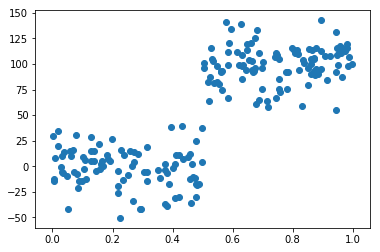

In [104]:
myDatTest = loadDataSet("ex2test.txt")
myMat2Test = np.mat(myDatTest)

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.scatter(np.array(myDatTest)[:,0], np.array(myDatTest)[:,1])

In [105]:
prune(myTree, myMat2Test)

merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging


{'left': {'left': {'left': {'left': 92.5239915,
    'right': {'left': {'left': {'left': 112.386764,
       'right': 123.559747,
       'spInd': 0,
       'spVal': 0.960398},
      'right': 135.837013,
      'spInd': 0,
      'spVal': 0.958512},
     'right': {'left': 91.47616500000001,
      'right': 130.92648,
      'spInd': 0,
      'spVal': 0.953902},
     'spInd': 0,
     'spVal': 0.956951},
    'spInd': 0,
    'spVal': 0.965969},
   'right': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': 100.649591,
                'right': 73.520802,
                'spInd': 0,
                'spVal': 0.952377},
               'right': 105.752508,
               'spInd': 0,
               'spVal': 0.949198},
              'right': 69.318649,
              'spInd': 0,
              'spVal': 0.948822},
             'right': {'left': {'left': 110.03503850000001,
               'right': {'left': 65.548418,
                'right':

## 모델 트리
* 구간별로 선형인 모델을 적용하는 모델링 방법
* 단말 노드에 상수 값 대신 선형 모델을 생성하도록 하면 됨.
* 이 알고리즘의 가장 중요한 부분은 오류를 측정 하는 부분

In [109]:
def linearSolve(dataSet):
    m,n = np.shape(dataSet)
    # 독립변수 X와 목적 변수 Y 형식으로 만듬.
    X = np.mat(np.ones((m,n)))
    Y = np.mat(np.ones((m,1)))
    X[:, 1:n] = dataSet[:, 0:n-1]
    Y = dataSet[:, -1]
    
    xTx = X.T * X
    
    if np.linalg.det(xTx) == 0.0:
        raise NameError("This matrix is singular, cannot do inverse, \n try increasing the second value of ops")
    ws = xTx.I * (X.T * Y)
    return ws, X, Y

In [114]:
# regLeaf()와 하는일 유사. 
# 데이터 집합으로 LinearSolve 호출하과 회귀계수(ws) 를 반환
def modelLeaf(dataSet):
    ws, X, Y = linearSolve(dataSet)
    return ws

In [111]:
# 주어진 데이터 집합에 대한 오류를 계산
# 데이터 분할을 결정하는데 사용됨
def modelErr(dataSet):
    ws, X, Y = linearSolve(dataSet)
    yHat = X * ws
    return sum(np.power(Y - yHat, 2))

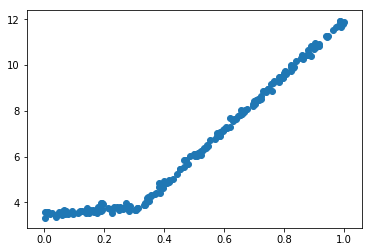

In [112]:
myDat3 = loadDataSet("exp2.txt")
myMat3 = np.mat(myDat3)

fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.scatter(np.array(myDat3)[:,0], np.array(myDat3)[:,1])

In [113]:
createTree(myMat3, modelLeaf, modelErr, (1,10))

S :  [[79.88742871]]
Best S :  [[19.68963075]]
Best S :  [[4.16260226]]
Best S :  [[2.13339927]]
Best S :  [[2.02751253]]
Best S :  [[1.94888685]]
Best S :  [[1.92631642]]
Best S :  [[1.92073313]]
Best S :  [[1.90370197]]
S - bestS =  [[77.98372674]]
Third
S :  [[1.32128297]]
Best S :  [[1.31092598]]
Best S :  [[1.31090622]]
Best S :  [[1.30472708]]
Best S :  [[1.30231973]]
Best S :  [[1.29739833]]
Best S :  [[1.29249649]]
Best S :  [[1.28965167]]
Best S :  [[1.27341094]]
S - bestS =  [[0.04787202]]
First
S :  [[0.582419]]
Best S :  [[0.56832383]]
Best S :  [[0.55716875]]
Best S :  [[0.55010159]]
Best S :  [[0.50335423]]
Best S :  [[0.4978161]]
S - bestS =  [[0.0846029]]
First


{'left': matrix([[1.69855694e-03],
         [1.19647739e+01]]), 'right': matrix([[3.46877936],
         [1.18521743]]), 'spInd': 0, 'spVal': 0.285477}

## 예제: 일반 회귀와 트리 방법 비교

In [117]:
def regTreeEval(model, inDat):
    return float(model)

In [118]:
def modelTreeEval(model, inDat):
    n = np.shape(inDat)[1]
    X = np.mat(np.ones((1, n+1)))
    X[:, 1:n+1] = inDat
    return float(X*model)

In [119]:
def treeForeCast(tree, inData, modelEval = regTreeEval):
    if not isTree(tree):
        return modelEval(tree, inData)
    if inData[tree["spInd"]] > tree["spVal"]:
        if isTree(tree["left"]):
            return treeForeCast(tree["left"], inData, modelEval)
        else:
            return modelEval(tree["left"], inData)
    else:
        if isTree(tree["right"]):
            return treeForeCast(tree["right"], inData, modelEval)
        else:
            return modelEval(tree["right"], inData)

In [120]:
def createForeCast(tree, testData, modelEval=regTreeEval):
    m = len(testData)
    yHat = np.mat(np.zeros((m,1)))
    for i in range(m):
        yHat[i, 0] = treeForeCast(tree, np.mat(testData[i]), modelEval)
    return yHat

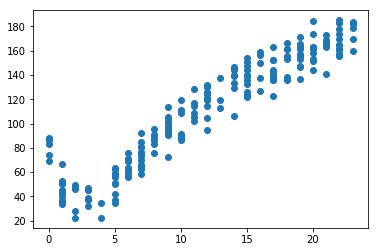

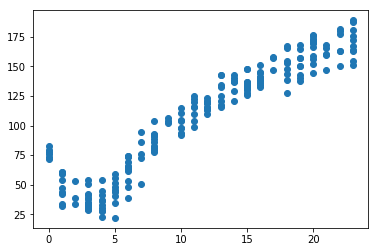

In [124]:
trainMat = np.mat(loadDataSet("bikeSpeedVslq_train.txt"))
testMat = np.mat(loadDataSet("bikeSpeedVslq_test.txt"))

fig5 = plt.figure()
ax5 = fig5.add_subplot(111)
ax5.scatter(np.array(trainMat)[:,0], np.array(trainMat)[:,1])

fig6 = plt.figure()
ax6 = fig6.add_subplot(111)
ax6.scatter(np.array(testMat)[:,0], np.array(testMat)[:,1])

In [128]:
myTree = createTree(trainMat, ops=(1,20))
yHat = createForeCast(myTree, testMat[:, 0])
np.corrcoef(yHat, testMat[:, 1], rowvar=0)[0,1]

0.964085231822215

In [129]:
myTree = createTree(trainMat, modelLeaf, modelErr, (1, 20))
yHat = createForeCast(myTree, testMat[:, 0], modelTreeEval)
np.corrcoef(yHat, testMat[:, 1], rowvar=0)[0,1]

0.9760412191380629

In [130]:
ws, X, Y = linearSolve(trainMat)
ws

matrix([[37.58916794],
        [ 6.18978355]])

In [36]:
for i in range(np.shape(testMat)[0]):
    yHat[i] = testMat[i , 0] * ws[1, 0] + ws[0, 0]
# yHat
np.corrcoef(yHat, testMat[:, 1], rowvar=0)[0,1]

0.9434684235674766

## Tkinter 사용 법

In [63]:
from tkinter import *
import matplotlib
matplotlib.use("TkAgg")
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import numpy as np

In [57]:
def reDraw(tolS, tolN):
    reDraw.f.clf()
    reDraw.a = reDraw.f.add_subplot(111)
    
    if chkBtnVar.get():
        if tolN < 2:
            tolN = 2
        myTree = createTree(reDraw.rawDat, modelLeaf, modelErr, (tolS, tolN))
        yHat = createForeCast(myTree, reDraw.testDat, modelTreeEval)
    else:
        myTree = createTree(reDraw.rawDat, ops=(tolS, tolN))
        yHat = createForeCast(myTree, reDraw.testDat)
    
    reDraw.a.scatter(reDraw.rawDat[:, 0].flatten().A[0], reDraw.rawDat[:, 1].flatten().A[0], s = 5)
    reDraw.a.plot(reDraw.testDat, yHat, linewidth = 2.0)
    reDraw.canvas.show()

In [58]:
def getInputs():
    try:
        tolN = int(tolNentry.get())
    except:
        tolN = 10
        print("Enter Integer for tolN")
        tolNentry.delete(0, END)
        tolNentry.insert(0, "10")
    
    try:
        tolS = float(tolSentry.get())
    except:
        tolS = 1.0
        print("Enter Float for tolS")
        tolSentry.delete(0, END)
        tolSentry.insert(0, "1.0")
    
    return tolN, tolS

In [61]:
def drawNewTree():
    tolN, tolS = getInputs()
    reDraw(tolS, tolN)

In [62]:
root = Tk()

reDraw.f = Figure(figsize=(5,4), dpi=100) #create canvas
reDraw.canvas = FigureCanvasTkAgg(reDraw.f, master=root)
reDraw.canvas.show()
reDraw.canvas.get_tk_widget().grid(row=0, columnspan=3)
# Label(root, text="Plot Place Holder").grid(row=0, columnspan=3)

Label(root, text="tolN").grid(row=1, column=0)
tolNentry = Entry(root)
tolNentry.grid(row=1, column=1)
tolNentry.insert(0, "10")

Label(root, text="tolS").grid(row=2, column=0)
tolSentry = Entry(root)
tolSentry.grid(row=2, column=1)
tolSentry.insert(0, "1.0")

Button(root, text="ReDraw", command=drawNewTree).grid(row=1, column=2, rowspan=3)
chkBtnVar = IntVar()
chkBtn = Checkbutton(root, text="Model Tree", variable=chkBtnVar)
chkBtn.grid(row=3, column = 0, columnspan=2)

reDraw.rawDat = np.mat(loadDataSet("sine.txt"))
reDraw.testDat = np.arange(np.min(reDraw.rawDat[:, 0]), np.max(reDraw.rawDat[:, 0]), 0.01)
reDraw(1.0, 10)
root.mainloop()

c:\python\python36\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: The FigureCanvasTk.show function was deprecated in version 2.2. Use FigureCanvasTk.draw instead.
  """
c:\python\python36\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: The FigureCanvasTk.show function was deprecated in version 2.2. Use FigureCanvasTk.draw instead.
  app.launch_new_instance()
